In [61]:
import tensorflow as tf
import os
import cv2
import imghdr


Removing Dodgy images

In [202]:
data_dir = 'testers'
image_exts = ['jpeg','png','jpg','bmp']
os.listdir(data_dir)

['no', 'yes']

In [195]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir,image_class)):
        image_path = os.path.join(data_dir,image_class,image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print("Image not in expected format - {}".format(image_path))
                os.remove(image_path)
        except Exception as e:
            print("Issue in image - {}".format(image_path))

Loading data

In [64]:
import numpy as numpy
from matplotlib import pyplot as plt

In [233]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 7249 files belonging to 2 classes.


In [234]:
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()
batch[0].shape

(32, 256, 256, 3)

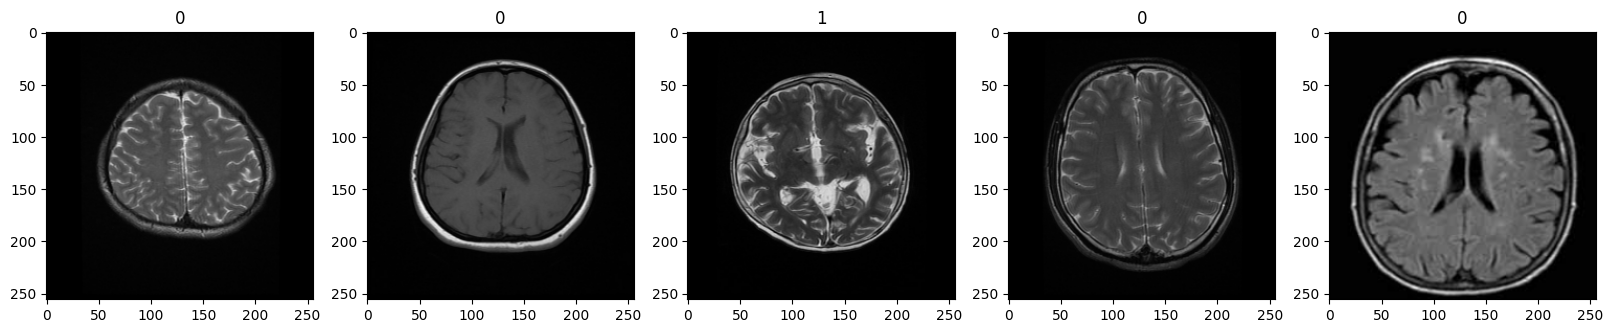

In [251]:
tot_images = 5
fig,ax = plt.subplots(ncols=tot_images,figsize=(20,20))
for idx,img in enumerate(batch[0][:tot_images]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

Data Preprocessing

Scale Data

In [252]:
data = data.map(lambda x, y: (x/255, y))

In [253]:
scaled_iterator = data.as_numpy_iterator()
batch = scaled_iterator.next()
batch

(array([[[[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         ...,
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]]],
 
 
        [

Split Data

In [207]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1
val_size+train_size+test_size

227

In [208]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

Deep Learning

Build Model

In [72]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [214]:
model = Sequential()

In [215]:
model.add(Conv2D(16,(3,3),1,activation='relu',input_shape = (256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [216]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [217]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 127, 127, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 62, 62, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 30, 30, 16)      

Train

In [218]:
logdir='logs'
tensorCallback = tf.keras.callbacks.TensorBoard(log_dir = logdir)

In [219]:
hist = model.fit(train,epochs=5,validation_data=val,callbacks=[tensorCallback])

Epoch 1/5
158/158 [==============================] - 272s 2s/step - loss: 0.2410 - accuracy: 0.9110 - val_loss: 0.1734 - val_accuracy: 0.9443
Epoch 2/5
158/158 [==============================] - 298s 2s/step - loss: 0.1471 - accuracy: 0.9472 - val_loss: 0.1414 - val_accuracy: 0.9518
Epoch 3/5
158/158 [==============================] - 288s 2s/step - loss: 0.0953 - accuracy: 0.9678 - val_loss: 0.1185 - val_accuracy: 0.9552
Epoch 4/5
158/158 [==============================] - 291s 2s/step - loss: 0.0675 - accuracy: 0.9765 - val_loss: 0.1082 - val_accuracy: 0.9674
Epoch 5/5
158/158 [==============================] - 294s 2s/step - loss: 0.0531 - accuracy: 0.9824 - val_loss: 0.0926 - val_accuracy: 0.9667


Plot Performance

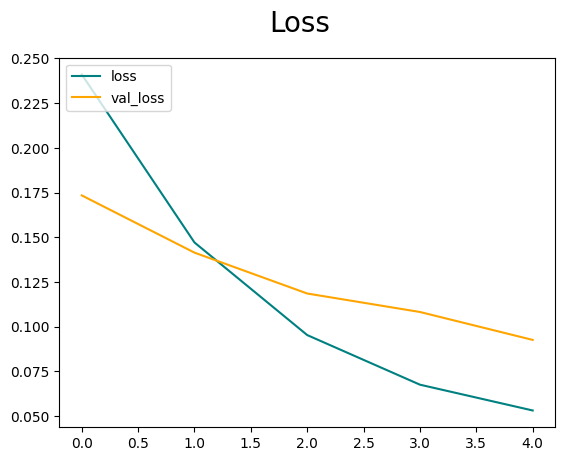

In [220]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

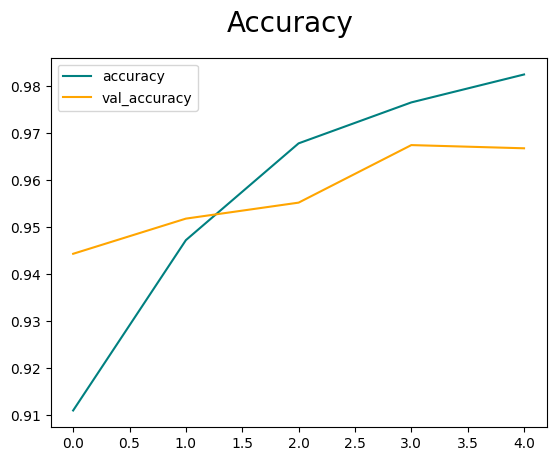

In [221]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

Evaluate

In [254]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

pre = Precision()
re = Recall()
acc = BinaryAccuracy()

for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

print(f'Precision = {pre.result().numpy()}, Recall = {re.result().numpy()}, Accuracy = {acc.result().numpy()}')

1/1 [==============================] - 0s 129ms/step
Precision = 0.9579579830169678, Recall = 0.9465875625610352, Accuracy = 0.9556171894073486


Save the model

In [255]:
from tensorflow.keras.models import load_model
model.save('brain_tumor.h5')